In [ ]:
#https://www.askpython.com/python/examples/principal-component-analysis

Principal component analysis or PCA in short is famously known as a dimensionality reduction technique.

It has been around since 1901 and still used as a predominant dimensionality reduction method in machine learning and statistics. PCA is an unsupervised statistical method.

In this article, we will have some intuition about PCA and will implement it by ourselves from scratch using Python and NumPy.


**Why use PCA in the first place?**

To support the cause of using PCA let’s look at one example.

Suppose we have a dataset having two variables and 10 number of data points. If we were asked to visualize the data points, we can do it very easily. The result is very interpretable as well.

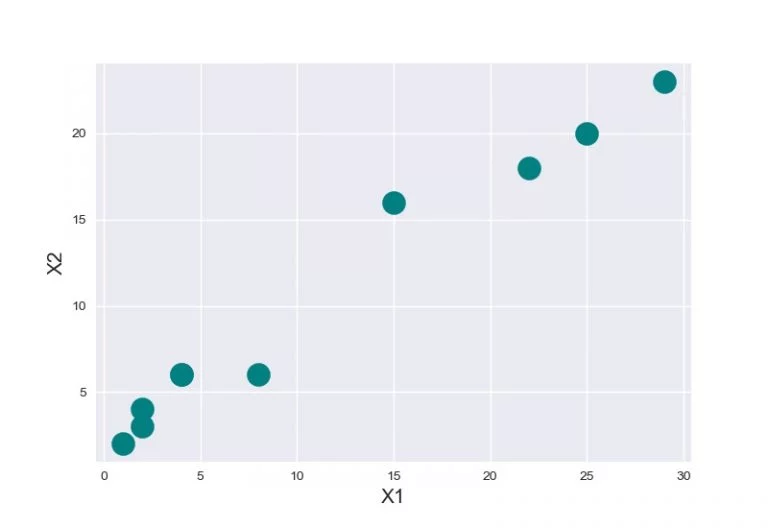

Now if we try to increase the number of variables it gets almost impossible for us to imagine a dimension higher than three-dimensions. 

This problem we face when analyzing higher-dimensional datasets is what commonly referred to as “The curse of dimensionality”. This term was first coined by Richard E. Bellman.


Principal Component analysis reduces high dimensional data to lower dimensions while capturing maximum variability of the dataset. Data visualization is the most common application of PCA. PCA is also used to make the training of an algorithm faster by reducing the number of dimensions of the data.

**We can think of Principal Component analysis to be like fitting an n-dimensional ellipsoid to the data so that each axis of the ellipsoid represents a principal component. The larger the principal component axis the larger the variability in data it represents.**

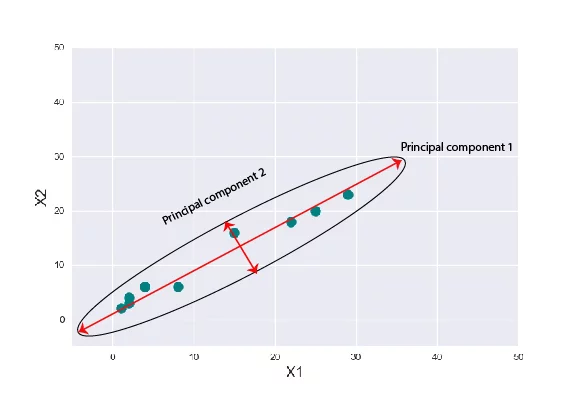

In [ ]:
##Steps to implement PCA in Python

#Importing required libraries
import numpy as np

1. **Subtract the mean of each variable**

Subtract the mean of each variable from the dataset so that the dataset should be centered on the origin. Doing this proves to be very helpful when calculating the covariance matrix.


In [ ]:
#Generate a dummy dataset.
X = np.random.randint(10,50,100).reshape(20,5) 
# mean Centering the data  
X_meaned = X - np.mean(X , axis = 0)


Data generated by the above code have dimensions (20,5) i.e. 20 examples and 5 variables for each example. we calculated the mean of each variable and subtracted that from every row of the respective column.

2. Calculate the Covariance Matrix
Calculate the Covariance Matrix of the mean-centered data. 
The covariance matrix is a square matrix denoting the covariance of the elements with each other. The covariance of an element with itself is nothing but just its Variance.
That’s why the diagonal elements of a covariance matrix are just the variance of the elements.

In [ ]:
# calculating the covariance matrix of the mean-centered data.
cov_mat = np.cov(X_meaned , rowvar = False)


We can find easily calculate covariance Matrix using numpy.cov( ) method. The default value for rowvar is set to True, remember to set it to False to get the covariance matrix in the required dimensions.

**3. Compute the Eigenvalues and Eigenvectors**

Now, compute the Eigenvalues and Eigenvectors for the calculated Covariance matrix. The Eigenvectors of the Covariance matrix we get are Orthogonal to each other and each vector represents a principal axis.

A Higher Eigenvalue corresponds to a higher variability. Hence the principal axis with the higher Eigenvalue will be an axis capturing higher variability in the data.

Orthogonal means the vectors are mutually perpendicular to each other. Eigenvalues and vectors seem to be very scary until we get the idea and concepts behind it.

In [ ]:
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

**4. Sort Eigenvalues in descending order**

Sort the Eigenvalues in the descending order along with their corresponding Eigenvector.

Remember each column in the Eigen vector-matrix corresponds to a principal component, so arranging them in descending order of their Eigenvalue will automatically arrange the principal component in descending order of their variability.

Hence the first column in our rearranged Eigen vector-matrix will be a principal component that captures the highest variability.

In [ ]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
 
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

**5. Select a subset from the rearranged Eigenvalue matrix**

Select a subset from the rearranged Eigenvalue matrix as per our need i.e. number_comp = 2. This means we selected the first two principal components.

n_components = 2 means our final data should be reduced to just 2 variables. if we change it to 3 then we get our data reduced to 3 variables.


In [ ]:
# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
 
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

**6. Transform the data**

Finally, transform the data by having a dot product between the Transpose of the Eigenvector subset and the Transpose of the mean-centered data. By transposing the outcome of the dot product, the result we get is the data reduced to lower dimensions from higher dimensions.





In [ ]:
#Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()


The final dimensions of X_reduced will be ( 20, 2 ) and originally the data was of higher dimensions ( 20, 5 ).

Now we can visualize our data with the available tools we have

In [ ]:
###PCA on IRIS dataset

import pandas as pd
from sklearn.decomposition import PCA

#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
#prepare the data
x = data.iloc[:,0:4]
 
#prepare the target
target = data.iloc[:,4]
 
#Applying it to PCA function
#mat_reduced = PCA(n_components=2)

pca=PCA(n_components=2)
principalComponents = pca.fit_transform(x)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(principalComponents , columns = ['PC1', 'PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)


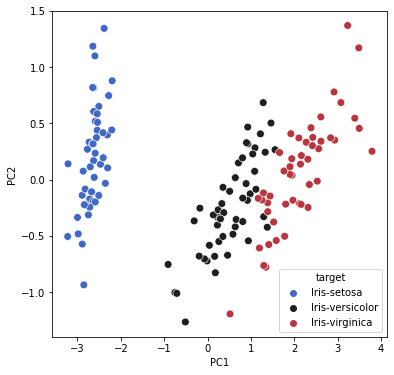

In [ ]:


import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')
